<div align="center">

# <span style="color: #3498db;">Data Science Course - Spring 2025</span>

**<span style="color: #3498db;">Mehrnaz Hosseini</span> - <span style="color: #3498db;">220701051</span>**

**<span style="color: #3498db;">Helia Ranjbar</span> - <span  style="color: #3498db;">220701062</span>**

</div>


# **🧠 Task 1: Sampling using Langevin Dynamics**

## **🎯 Objective**

In this task, we will implement **Langevin Dynamics**, a sampling algorithm that allows us to draw samples from a complex distribution even when the **normalization constant is unknown**.


### **What We'll Do:**

**1.** **Construct a 2D Gaussian distribution**: Visualize its probability density function (PDF).

**2.** **Derive the score function**: Explore the gradient of the log probability and analyze its behavior.

**3.** **Implement Langevin Dynamics sampling**: Simulate samples by incorporating score-based updates and stochastic noise.

**4.** **Compare the sampling results**: Visually and statistically contrast Langevin Dynamics with direct sampling from `numpy.random.multivariate_normal`.


&nbsp;<br>
&nbsp;

---

### **Import the libraries**

In [74]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
import warnings
import pandas as pd
import time


warnings.filterwarnings('ignore')
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

## **1️⃣ Plotting a 2D Gaussian Distribution**

### **Conceptual Overview:**
A **Gaussian distribution** is parameterized by:
- Mean $$\mu$$: Determines the center of the distribution.
- Covariance matrix $$\Sigma$$: Encodes the spread and correlation between dimensions.

For a **multivariate Gaussian**:
$$p(x) = \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} e^{-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)},$$
where:
- $d$ is the dimensionality (2 in this case).
- $|\Sigma|$ is the determinant of the covariance matrix.

We define $$\mu = [-5, 5]$$ and $$\Sigma = 5I$$ (identity matrix scaled by 5).

&nbsp;<br>
&nbsp;<br>
&nbsp;

#### **Code Structure for Plotting**
The code performs the following steps:
1. **Grid Definition**: Creates a meshgrid for evaluating the Gaussian PDF at various points.
2. **PDF Calculation**: Uses `scipy.stats.multivariate_normal` to compute the probability density over the grid.
3. **Visualization**:
   - Heatmap: Represents the PDF as a 2D image where colors indicate density.
   - Scatter Plot: Highlights the mean as a reference point.

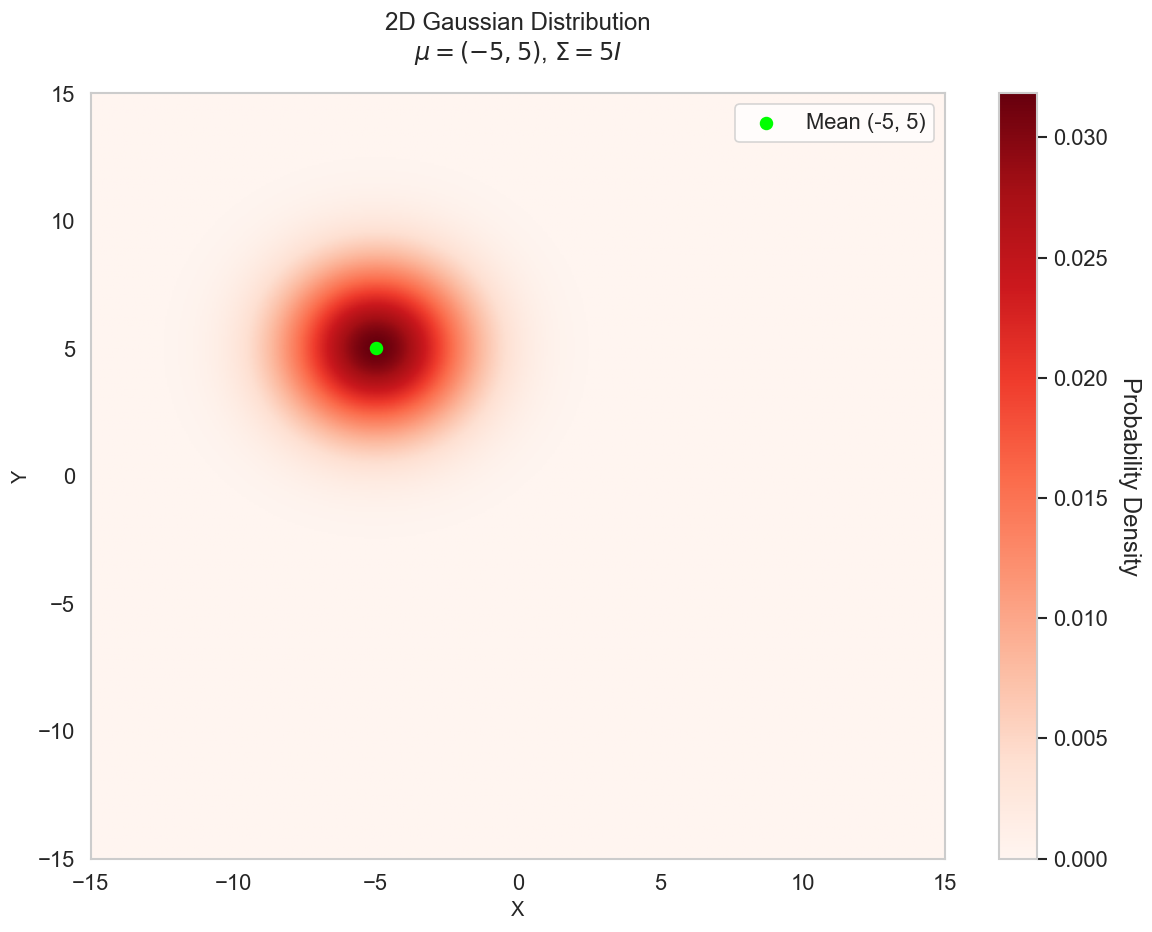

In [75]:
mean = np.array([-5, 5])
cov = 5 * np.eye(2)

def plot_gaussian_heatmap(mean, cov):
    x = y = np.linspace(-15, 15, 500)
    X, Y = np.meshgrid(x, y)
    
    rv = multivariate_normal(mean, cov)
    Z = rv.pdf(np.dstack((X, Y)))

    plt.figure(figsize=(10, 8), dpi=120)
    
    img = plt.imshow(Z, extent=[-15, 15, -15, 15], 
                    cmap='Reds', 
                    origin='lower',
                    aspect='auto',
                    )
    
    plt.scatter(mean[0], mean[1], c='lime', s=50, 
               label=f'Mean ({mean[0]}, {mean[1]})')
    
    cbar = plt.colorbar(img)
    cbar.set_label('Probability Density', rotation=270, labelpad=20)
    
    plt.title('2D Gaussian Distribution\n' + 
             r'$\mu=(-5, 5)$, $\Sigma=5I$', pad=20)
    plt.xlabel('X', fontsize=12)
    plt.ylabel('Y', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.grid(False)
    plt.show()

plot_gaussian_heatmap(mean, cov)

### **Observations**

### **Observations for Gaussian Heatmap**

#### **1. Mathematical Observation**
- The Gaussian heatmap accurately represents the **multivariate Gaussian distribution** defined by:
  - Mean $\mu$ = [-5, 5]: The center of the distribution, highlighted with a lime-green dot.
  - Covariance $\Sigma = 5I$: A diagonal matrix, scaled by 5, indicating that the dimensions $x_1$ and $x_2$ are independent and have equal variance.
- The Gaussian's probability density decreases symmetrically as we move farther from the mean, creating a bell-shaped contour in 2D space.

#### **2. Distribution Shape**
- **Peak Density**: The darkest red region corresponds to the highest probability density (centered at the mean $(-5, 5)$.
- **Spread**: The contour lines spread uniformly outward, reflecting the isotropic nature of the covariance matrix $\Sigma = 5I$. This indicates that the Gaussian has equal variance in both dimensions.


&nbsp;<br>
&nbsp;

---


&nbsp;<br>

## **2️⃣ Deriving and Visualizing the Score Function**

### **Mathematical Derivation**:
The **score function** is defined as:
$$S(x) = \nabla_x \log p(x).$$

For a Gaussian distribution:
$$S(x) = - \Sigma^{-1} (x - \mu),$$
where:
- $\Sigma^{-1}$ is the inverse covariance matrix.
- $\mu$ is the mean.

The score function describes the direction and magnitude of change required for points to move toward regions of higher probability density.

&nbsp;<br>
&nbsp;<br>
&nbsp;



### **Complete Step-by-Step Derivation of the Gaussian Score Function**

&nbsp;<br>
&nbsp;

#### **1. Definition of the Score Function**
The score function is the gradient of the log probability density function (log-PDF):

$$
S(x) = \nabla_x \log p(x)
$$

&nbsp;<br>
&nbsp;

#### **2. Multivariate Gaussian PDF**
The PDF of a multivariate Gaussian is:

$$
p(x) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(x - \mu)^T \Sigma^{-1} (x - \mu)\right)
$$

where:
- $x$: Data point (column vector)
- $\mu$: Mean vector
- $\Sigma$: Covariance matrix (symmetric positive definite)
- $|\Sigma|$: Determinant of $\Sigma$
- $d$: Dimension of $x$

&nbsp;<br>
&nbsp;

#### **3. Take the Logarithm of the PDF**
We compute $\log p(x)$, dropping constant terms (since they disappear in the gradient):

$$
\log p(x) = \text{constant} - \frac{1}{2}(x - \mu)^T \Sigma^{-1} (x - \mu)
$$

Only the quadratic term depends on $x$, so:

$$
\nabla_x \log p(x) = \nabla_x \left[-\frac{1}{2}(x - \mu)^T \Sigma^{-1} (x - \mu)\right]
$$

&nbsp;<br>
&nbsp;

#### **4. Expand the Quadratic Form**
Let’s expand $(x - \mu)^T \Sigma^{-1} (x - \mu)$:

$$
= x^T \Sigma^{-1} x - x^T \Sigma^{-1} \mu - \mu^T \Sigma^{-1} x + \mu^T \Sigma^{-1} \mu
$$

Because $\Sigma^{-1}$ is symmetric ($\Sigma^{-1} = (\Sigma^{-1})^T$), we can simplify:
- $x^T \Sigma^{-1} \mu = \mu^T \Sigma^{-1} x$ (they are scalars and equal to their transposes)

Thus:

$$
= x^T \Sigma^{-1} x - 2 \mu^T \Sigma^{-1} x + \mu^T \Sigma^{-1} \mu
$$

&nbsp;<br>
&nbsp;

#### **5. Compute the Gradient Term-by-Term**
Now, take the gradient $\nabla_x$ of each term:

##### **(a) Gradient of $x^T \Sigma^{-1} x$**
From matrix calculus (as derived earlier):

$$
\nabla_x [x^T \Sigma^{-1} x] = 2 \Sigma^{-1} x
$$

##### **(b) Gradient of $-2 \mu^T \Sigma^{-1} x$**
This is linear in $x$. The gradient is:

$$
\nabla_x [-2 \mu^T \Sigma^{-1} x] = -2 \Sigma^{-1} \mu
$$

(Because $\nabla_x [a^T x] = a$ for any constant vector $a$.)

##### **(c) Gradient of $\mu^T \Sigma^{-1} \mu$**
This term does not depend on $x$, so its gradient is zero:

$$
\nabla_x [\mu^T \Sigma^{-1} \mu] = 0
$$

&nbsp;<br>
&nbsp;

#### **6. Combine All Terms**
Now, combine the gradients of all terms:

$$
\nabla_x \log p(x) = -\frac{1}{2} \left( \nabla_x [x^T \Sigma^{-1} x] + \nabla_x [-2 \mu^T \Sigma^{-1} x] + \nabla_x [\mu^T \Sigma^{-1} \mu] \right) \\
= -\frac{1}{2} \left( 2 \Sigma^{-1} x - 2 \Sigma^{-1} \mu + 0 \right) \\
= -\frac{1}{2} (2 \Sigma^{-1} x - 2 \Sigma^{-1} \mu)
$$

Factor out the 2:

$$
= -\frac{1}{2} \cdot 2 (\Sigma^{-1} x - \Sigma^{-1} \mu) \\
= - \Sigma^{-1} (x - \mu)
$$

&nbsp;<br>
&nbsp;

#### **7. Final Score Function**
Thus, the score function for a multivariate Gaussian is:

$$
S(x) = \nabla_x \log p(x) = -\Sigma^{-1} (x - \mu)
$$

&nbsp;<br>
&nbsp;<br>
&nbsp;

### **Code Structure for Score Function**
1. **Matrix Computation**:
   - Uses `np.linalg.inv` to invert the covariance matrix $\Sigma$.
   - Computes the score using vectorized matrix operations.
2. **Quiver Plot**:
   - Represents the score vectors as arrows on a 2D plane.

In [76]:
def score_function(x, mean, cov):
    """
    Computes the score (gradient of log PDF) for 2D Gaussian
    Formula: ∇ₓ log p(x) = -Σ⁻¹(x - μ)
    """
    inv_cov = np.linalg.inv(cov)
    return -inv_cov @ (x - mean)

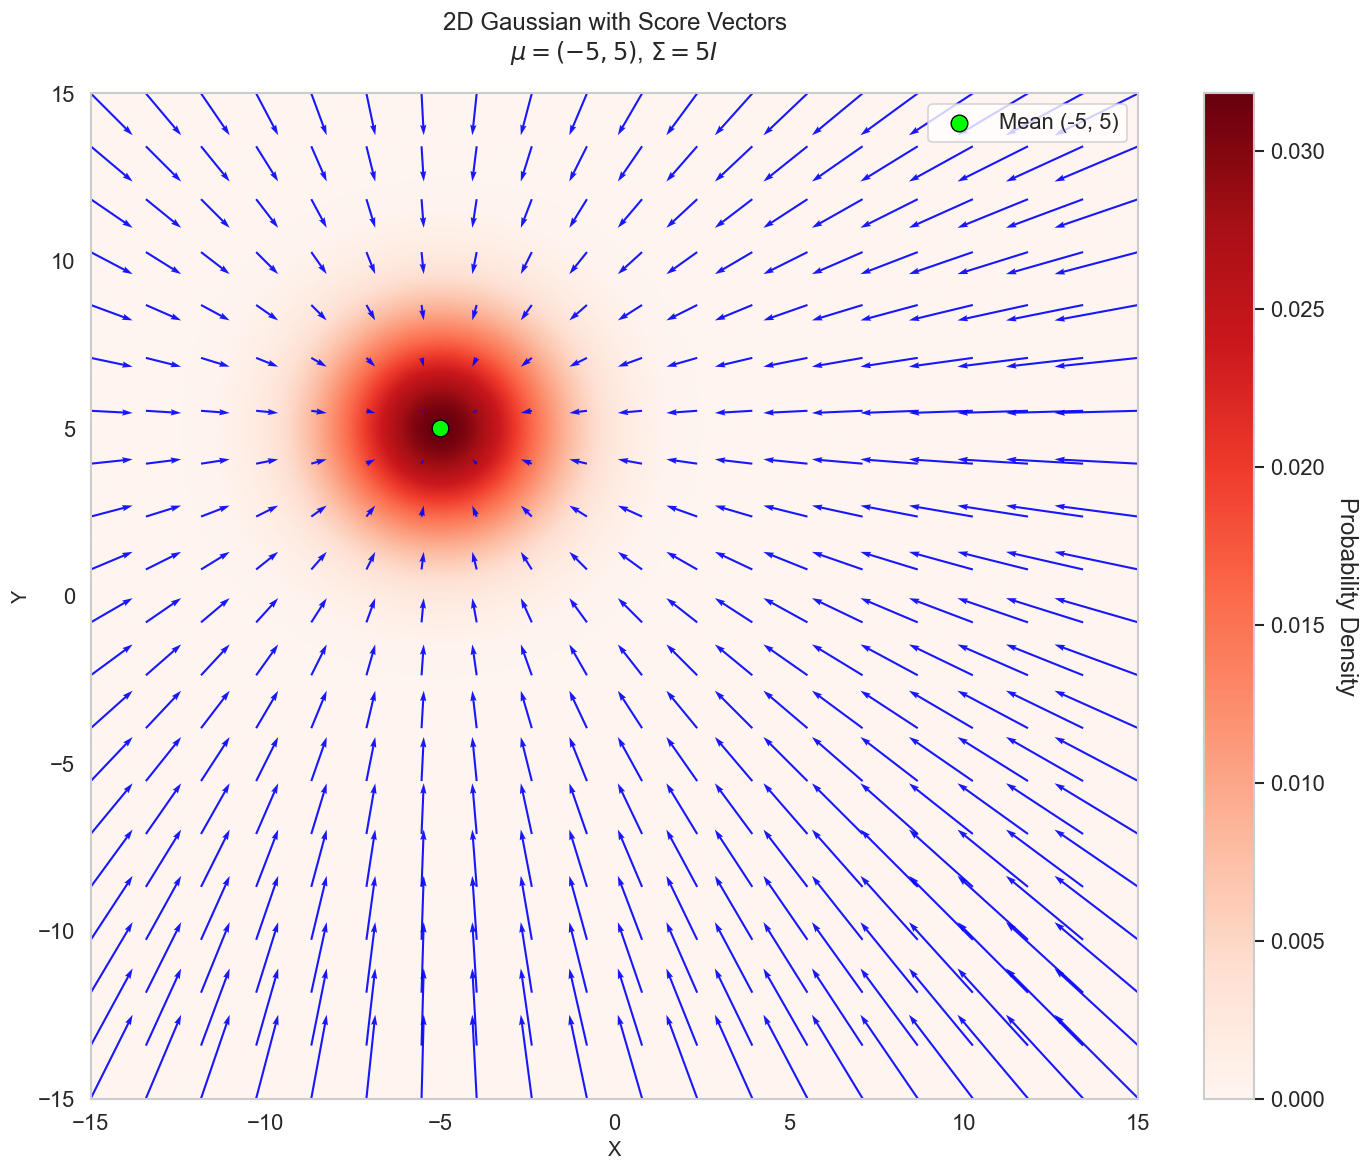

In [77]:
def plot_gaussian_with_scores(mean, cov):

    x_dense = y_dense = np.linspace(-15, 15, 500)
    X_dense, Y_dense = np.meshgrid(x_dense, y_dense)
    pos_dense = np.dstack((X_dense, Y_dense))

    x_sparse = y_sparse = np.linspace(-15, 15, 20)
    X_sparse, Y_sparse = np.meshgrid(x_sparse, y_sparse)
    pos_sparse = np.dstack((X_sparse, Y_sparse))

    rv = multivariate_normal(mean, cov)
    Z_dense = rv.pdf(pos_dense)

    scores = np.array([score_function(pos, mean, cov) for pos in pos_sparse.reshape(-1, 2)])
    U, V = scores[:, 0].reshape(X_sparse.shape), scores[:, 1].reshape(Y_sparse.shape)
    
    plt.figure(figsize=(12, 10), dpi=120)

    img = plt.imshow(Z_dense, extent=[-15, 15, -15, 15], 
                    cmap='Reds', 
                    origin='lower',
                    aspect='auto')

    plt.quiver(X_sparse, Y_sparse, U, V, 
              color='blue', 
              scale=50, 
              width=0.002,
              headwidth=3, 
              headlength=5,
              alpha=0.9)

    plt.scatter(mean[0], mean[1], c='lime', s=100, 
               edgecolor='black',
               linewidth=0.8,
               label=f'Mean ({mean[0]}, {mean[1]})')

    cbar = plt.colorbar(img)
    cbar.set_label('Probability Density', rotation=270, labelpad=20)
    plt.title('2D Gaussian with Score Vectors\n' + 
             r'$\mu=(-5, 5)$, $\Sigma=5I$', pad=20)
    plt.xlabel('X', fontsize=12)
    plt.ylabel('Y', fontsize=12)
    plt.legend(loc='upper right')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

plot_gaussian_with_scores(mean, cov)

### **Observations**

- The term $-(x - \mu)$ means the score always points toward the mean $\mu$.
- This matches intuition: the score guides samples toward higher-probability regions.
- In the **quiver plot**, the arrows (score vectors) consistently point inward, toward the mean of the Gaussian distribution, \((-5, 5)\). This behavior matches the theoretical understanding of the score function.
- The magnitude of the vectors is larger for points further away from the mean. This is expected because \((\mu - x)\) grows in magnitude as \(x\) moves further from the mean, increasing the "pull" back toward high-probability regions.

&nbsp;<br>
&nbsp;

---


&nbsp;<br>
&nbsp;

## **3️⃣ Langevin Dynamics Algorithm**

&nbsp;<br>

#### **What is Langevin Dynamics?**
Langevin Dynamics is a stochastic differential equation-based algorithm used to generate samples from a target distribution $p(x)$ when we only know its unnormalized form. This is especially useful in cases where the `normalization constant` of $p(x)$ is `unknown` or `computationally expensive` to calculate.

The update rule is:
$$
X_{t+1} \leftarrow X_t + \epsilon S(X_t) + \sqrt{2\epsilon}Z_t,
$$
where:
- $X_t$: The current position in the sample space.
- $S(X_t) = \nabla_x \log p(x)$: The score function, pointing toward areas of higher probability density (gradient ascent in the log of the target PDF).
- $\epsilon$: Step size (a hyperparameter controlling the size of each step).
- $Z_t \sim \mathcal{N}(0, I)$: Gaussian noise, ensuring randomness and exploration of the space.

&nbsp;<br>
&nbsp;

#### **How Does the Formula Work?**
1. **Drift Term ($\epsilon S(X_t)$)**:
   - This term uses the score function $S(X_t)$ to direct $X_t$ toward high-probability regions. It acts as a **deterministic force**, ensuring the samples move closer to areas where the probability density is higher.

2. **Diffusion Term ($\sqrt{2\epsilon}Z_t$)**:
   - The Gaussian noise $Z_t \sim \mathcal{N}(0, I)$ introduces randomness into the process. It prevents the samples from getting stuck in local maxima by allowing some exploration of the sample space.

3. **Combining Both Terms**:
   - The drift term ensures the samples converge toward the target distribution, while the diffusion term maintains the stochasticity required to explore the space.
   - Over time, the combined effect ensures that the generated samples match the target distribution $p(x)$.

&nbsp;<br>
&nbsp;

#### **Why Does Langevin Dynamics Generate Correct Samples?**
Langevin Dynamics is based on the principles of stochastic processes and ensures that the samples are asymptotically drawn from the desired distribution $p(x)$. The key idea is:
- The drift term aligns the sampling process with the gradients of the log-probability.
- The diffusion term ensures the correct amount of randomness is added, preserving the statistical properties of $p(x)$.

&nbsp;<br>
&nbsp;<br>
&nbsp;

#### **Code Structure for `langevin_dynamics`**

&nbsp;

1. **Initialization**:
   - The algorithm starts with a set of **initial points** (`initial_points`) randomly selected in the sample space.
   - The `trajectories` list is initialized to store the history of all sampled points over time.

2. **Iterative Langevin Updates**:
   - For each step:
     - **Score Computation**: The `score_func` is applied to compute the score (gradient of $\log p(x)$) at the current points.
     - **Noise Addition**: Gaussian noise is added, scaled by the step size $\sqrt{2\epsilon}$.
     - **Update Rule**: The new positions are computed as a combination of the current position, the drift term ($\epsilon S(X_t)$), and the noise term ($\sqrt{2\epsilon}Z_t$).
   - The updated positions are appended to `trajectories`.

3. **Output**:
   - The function returns:
     - `samples`: The final positions after all iterations.
     - `trajectories`: The full history of all sampled points, which can be used for visualization.

In [78]:
def langevin_dynamics(initial_points, score_func, n_steps=1000, epsilon=0.1):
    
    trajectories = []
    current_points = initial_points.copy()
    trajectories.append(current_points.copy())
    
    for _ in range(n_steps):
        scores = np.apply_along_axis(score_func, 1, current_points)
        noise = np.random.randn(*current_points.shape) * np.sqrt(2 * epsilon)
        current_points = current_points + epsilon * scores + noise
        trajectories.append(current_points.copy())
    
    return current_points, np.array(trajectories)

#### **Code Structure for `Langevin Dynamics Trajectories`**

1. Gaussian Heatmap:

2. Trajectory Visualization:

3. Final Samples:

In [79]:
def plot_langevin_trajectories(mean, cov, trajectories):

    x = y = np.linspace(-15, 15, 500)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    rv = multivariate_normal(mean, cov)
    Z = rv.pdf(pos)

    plt.figure(figsize=(12, 10), dpi=120)

    img = plt.imshow(Z, extent=[-15, 15, -15, 15], 
                    cmap='Reds', 
                    origin='lower',
                    aspect='auto')

    n_trajectories_to_plot = min(100, trajectories.shape[1])
    for i in range(n_trajectories_to_plot):
        x = trajectories[:, i, 0]
        y = trajectories[:, i, 1]

        plt.quiver(x[:-1], y[:-1], x[1:] - x[:-1], y[1:] - y[:-1], 
                   angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.6, width=0.0015)

    final_points = trajectories[-1]
    plt.scatter(final_points[:, 0], final_points[:, 1], 
               color='lime', 
               s=50,
               edgecolor='black',
               linewidth=0.8,
               label='Final samples',
               zorder=3)

    plt.colorbar(img).set_label('Probability Density', rotation=270, labelpad=20)
    plt.title(f'Langevin Dynamics Sampling\n{n_trajectories_to_plot} Trajectories Shown', pad=20)
    plt.xlabel('X', fontsize=12)
    plt.ylabel('Y', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

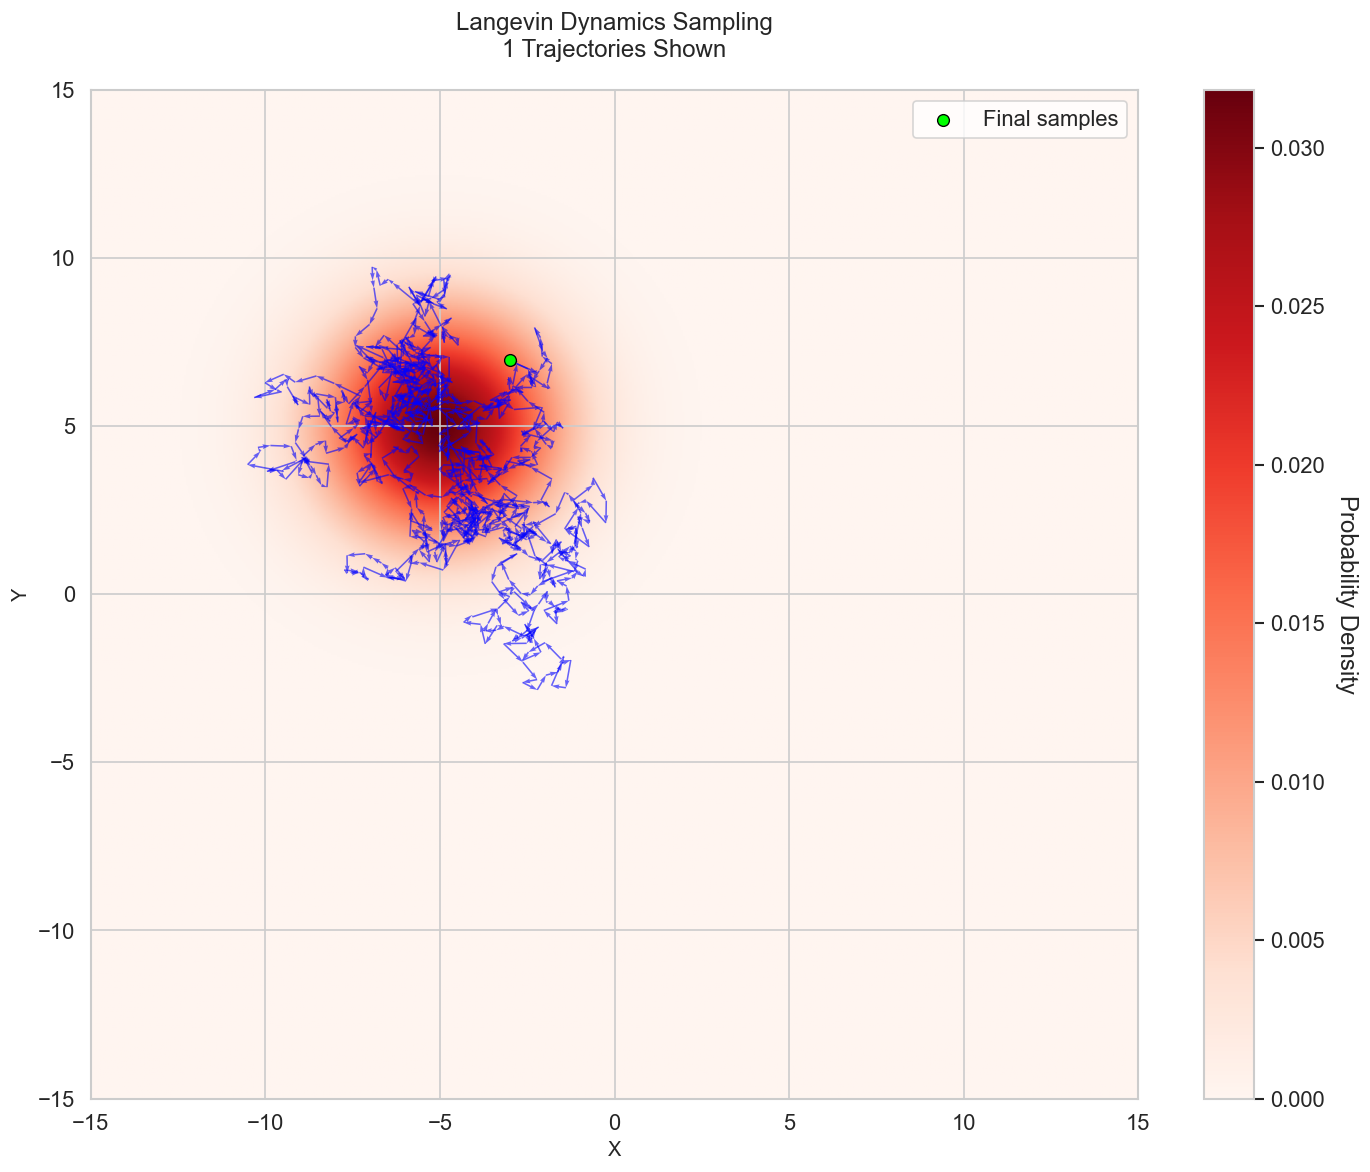

In [80]:
np.random.seed(41)

n_samples = 1
initial_points = np.random.randn(n_samples, 2) * 7
initial_points = np.clip(initial_points, -15, 15) 

samples, trajectories = langevin_dynamics(
    initial_points=initial_points,
    score_func=lambda x: score_function(x, mean, cov),
    n_steps=1000,
    epsilon=0.05
)

plot_langevin_trajectories(mean, cov, trajectories)

### **Observations from the Plot**


The blue trajectory shows the path of a single sample during the Langevin Dynamics sampling process:
  - The starting point begins in a lower-probability region, as seen in the lighter-colored areas of the heatmap.
  - Over successive iterations, the sample is "pulled" toward higher-density regions, following the score function (gradient of the log-probability).
  - The trajectory includes minor deviations due to the diffusion term $\sqrt{2\epsilon}Z_t$, which introduces randomness. This stochasticity is critical for ensuring the sample fully explores the distribution space.

&nbsp;<br>
&nbsp;

---

&nbsp;<br>
&nbsp;


## **4️⃣ Comparison of Sampling Methods**

&nbsp;

#### **Goal**:
We compare **Direct Sampling** using `numpy.random.multivariate_normal` with Langevin Dynamics Sampling to evaluate their consistency with the original Gaussian distribution. Each comparison method evaluates the results using visualizations, density estimations, distributions, and computational performance.

&nbsp;

Each comparison method evaluates the effectiveness of Langevin Dynamics in generating samples consistent with the target Gaussian distribution:

1. **Scatter Plots** check sample locations.

2. **Density Heatmaps** validate consistency in density representation.
 
3. **Marginal Distributions** confirm alignment along each axis.

4. **Joint Distributions** test structure in higher dimensions.
   
5. **Timing Results** highlight computational trade-offs between methods.

In [81]:
n_samples = 1000
initial_points = np.random.randn(n_samples, 2) * 7 
initial_points = np.clip(initial_points, -15, 15) 


samples, trajectories = langevin_dynamics(
    initial_points=initial_points,
    score_func=lambda x: score_function(x, mean, cov),
    n_steps=1000,
    epsilon=0.05
)

direct_samples = np.random.multivariate_normal(mean, cov, n_samples)

#### **1. Scatter Plot Comparison**

- The scatter plots compare the sampled points from **Direct Sampling** and **Langevin Dynamics Sampling**.
- Both methods aim to represent the Gaussian distribution. Points closer to the mean are denser, while farther points are sparsely distributed due to lower probability density.
- Direct sampling draws points directly from the known Gaussian distribution, ensuring immediate representation.
- Langevin Dynamics iteratively pulls samples toward high-density regions using the score function and adds randomness for exploration.

&nbsp;

**Observation**
   - Both plots effectively reflect the characteristics of the Gaussian distribution: a dense central region around $(-5, 5)$ and sparsity in lower-probability regions.
   - The samples from Langevin Dynamics show slightly more variability in areas far from the mean, likely due to the stochastic noise in the iterative updates.

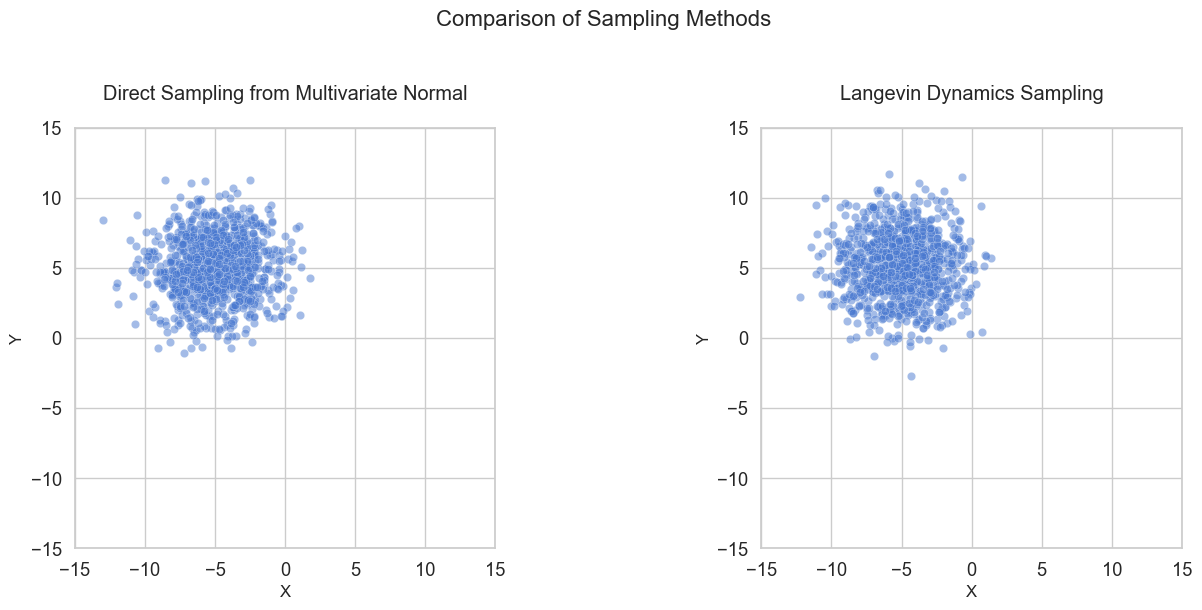

In [82]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.scatterplot(x=direct_samples[:, 0], y=direct_samples[:, 1], 
                alpha=0.5, edgecolor='w', linewidth=0.3)
plt.title('Direct Sampling from Multivariate Normal', pad=20)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.gca().set_aspect('equal')


plt.subplot(1, 2, 2)
sns.scatterplot(x=samples[:, 0], y=samples[:, 1], 
                alpha=0.5, edgecolor='w', linewidth=0.3)
plt.title('Langevin Dynamics Sampling', pad=20)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.gca().set_aspect('equal')


plt.suptitle('Comparison of Sampling Methods', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


#### **2. Density Heatmap Comparison**

- Kernel Density Estimation (KDE) plots are used to compare the density of samples from both methods.
- The direct samples' heatmap is compared to Langevin Dynamics' heatmap to assess how well they align with the Gaussian's true density.
- KDE plots allow verification of whether Langevin Dynamics accurately mimics the Gaussian density, especially in regions around the mean.

&nbsp;

**Observations**

- Both heatmaps display dense clustering near the mean and smooth decay outward, visually validating the Gaussian-like structure.
- Langevin Dynamics maintains smooth density even in low-probability regions, whereas Direct Sampling introduces minor variability. (but it is not a big deal and in different samples it differs so it is not a huge difference. )

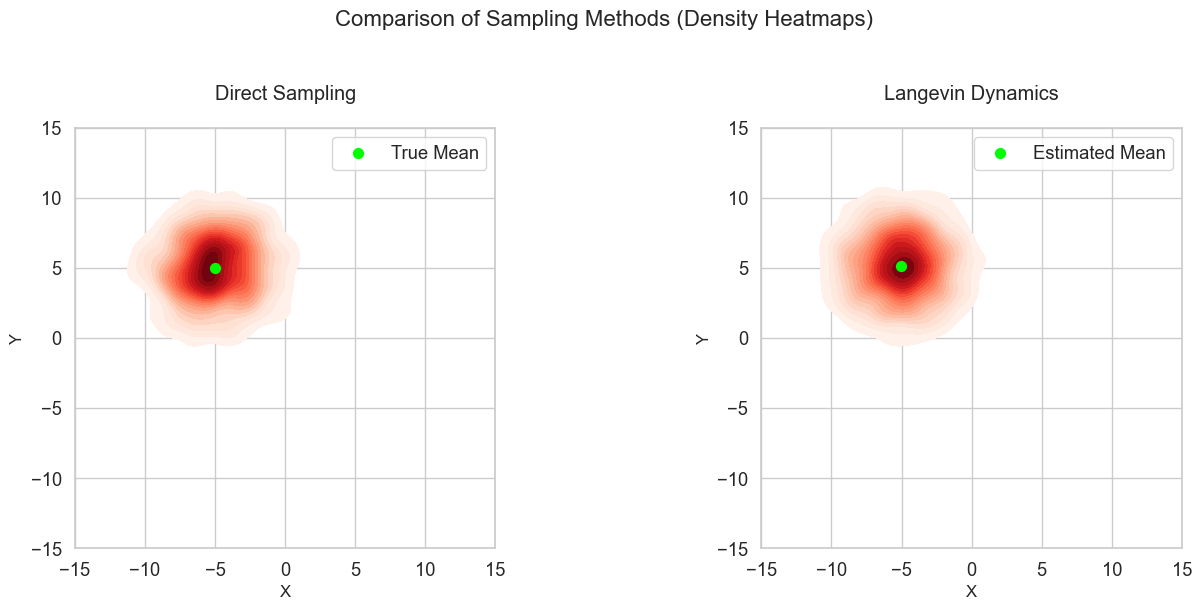

In [91]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(x=direct_samples[:, 0], y=direct_samples[:, 1], 
            cmap="Reds", fill=True, thresh=0.05, levels=20)
plt.scatter(mean[0], mean[1], c='lime', s=50, label='True Mean') 
plt.title('Direct Sampling', pad=20)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.gca().set_aspect('equal')
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(x=samples[:, 0], y=samples[:, 1], 
            cmap="Reds", fill=True, thresh=0.05, levels=20)
plt.scatter(np.mean(samples[:, 0]), np.mean(samples[:, 1]), 
            c='lime', s=50, label='Estimated Mean') 
plt.title('Langevin Dynamics', pad=20)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.gca().set_aspect('equal')
plt.legend()

plt.suptitle('Comparison of Sampling Methods (Density Heatmaps)', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

#### **3. Marginal Distribution Comparison**
- Histograms are used to compare the distributions along each dimension ($X$ and $Y$).
- Overlapping histograms for direct and Langevin samples show how similar their distributions are.

&nbsp;

**How It Works:**
- **KDE Lines**: Added to histogram plots for smooth representations of the density.
- **Mean Validation**: Vertical dashed lines indicate the computed mean of each sample set, comparing direct versus Langevin-generated means.

&nbsp;

**Observation**
- The histograms confirm perfect alignment with the Gaussian distribution, with KDE lines showing smooth density curves consistent with the expected bell-shaped marginal density.
- Both sampling methods effectively capture the marginal densities of the Gaussian along $X$ and $Y$. 
- The strong overlap in the histograms and KDE lines indicates high accuracy in representing the distribution.
- Vertical dashed lines show that the computed means for Direct Sampling and Langevin Dynamics align closely with the true Gaussian means $(-5, 5)$.


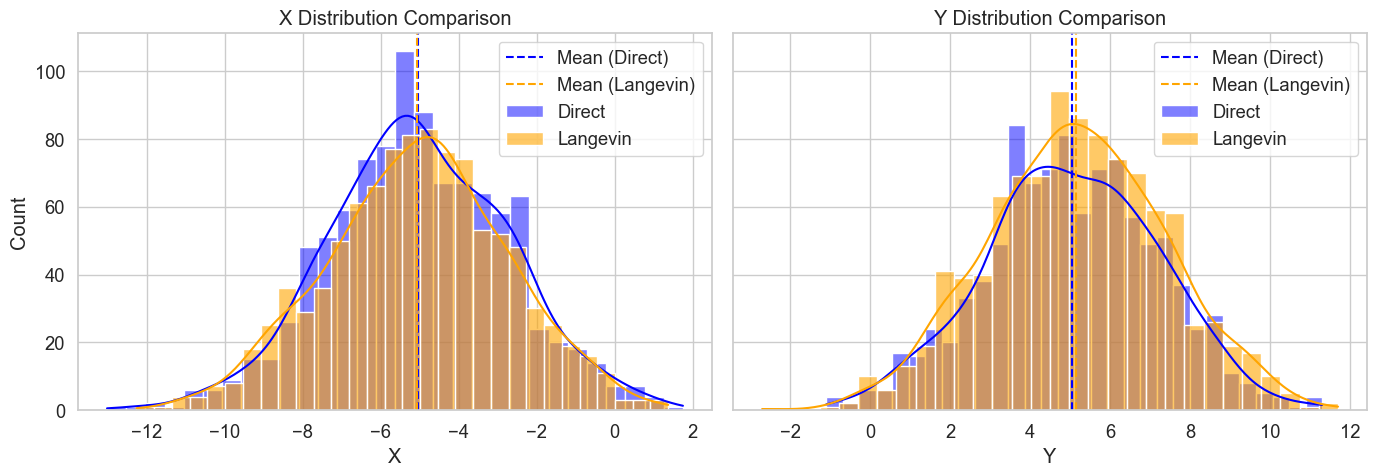

In [93]:
df_direct = pd.DataFrame(direct_samples, columns=['X', 'Y'])
df_direct['Method'] = 'Direct Sampling'
df_langevin = pd.DataFrame(samples, columns=['X', 'Y'])
df_langevin['Method'] = 'Langevin Dynamics'


fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.histplot(df_direct['X'], bins=30, color="blue", kde=True, ax=axes[0], label="Direct")
sns.histplot(df_langevin['X'], bins=30, color="orange", kde=True, ax=axes[0], label="Langevin", alpha=0.6)
axes[0].axvline(df_direct['X'].mean(), color='blue', linestyle='--', label='Mean (Direct)')
axes[0].axvline(df_langevin['X'].mean(), color='orange', linestyle='--', label='Mean (Langevin)')
axes[0].set_title("X Distribution Comparison")
axes[0].legend()

sns.histplot(df_direct['Y'], bins=30, color="blue", kde=True, ax=axes[1], label="Direct")
sns.histplot(df_langevin['Y'], bins=30, color="orange", kde=True, ax=axes[1], label="Langevin", alpha=0.6)
axes[1].axvline(df_direct['Y'].mean(), color='blue', linestyle='--', label='Mean (Direct)')
axes[1].axvline(df_langevin['Y'].mean(), color='orange', linestyle='--', label='Mean (Langevin)')
axes[1].set_title("Y Distribution Comparison")
axes[1].legend()

plt.tight_layout()
plt.show()

#### **4. Joint Distribution and Covariance Visualization**

- The joint distribution is plotted with scatter plots and marginal KDEs, enabling a complete view of how samples align with the Gaussian.

**Observations**

- Both methods display a clear elliptical clustering of points, consistent with the Gaussian distribution defined by the mean $(-5, 5)$
- Vertical and horizontal dashed lines indicate the Gaussian's true mean at $(-5, 5)$.
- Both methods show clustering of points near the true mean, validating their accuracy in representing the Gaussian distribution.


<Figure size 1400x600 with 0 Axes>

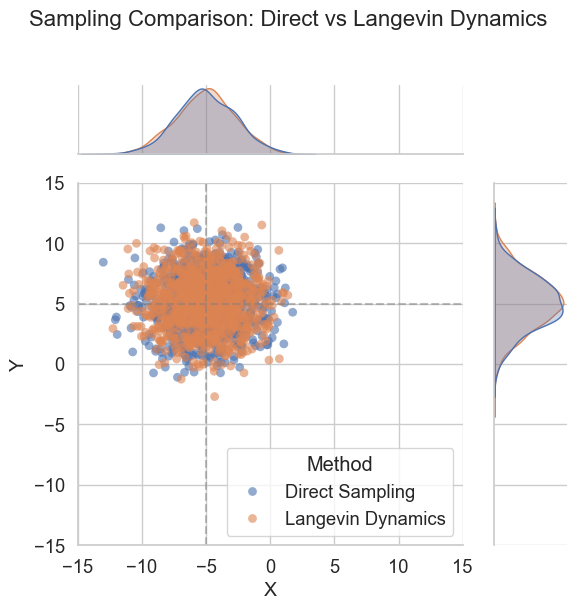

In [98]:
plt.figure(figsize=(14, 6))

df_direct = pd.DataFrame(direct_samples, columns=['x', 'y'])
df_direct['Method'] = 'Direct Sampling'
df_langevin = pd.DataFrame(samples, columns=['x', 'y'])
df_langevin['Method'] = 'Langevin Dynamics'
df_combined = pd.concat([df_direct, df_langevin])

g = sns.JointGrid(data=df_combined, x='x', y='y', hue='Method', 
                 height=6, ratio=4, palette=["#4C72B0", "#DD8452"])

g.plot_joint(
    sns.scatterplot,
    alpha=0.6,
    edgecolor='none',
    s=40
)

g.plot_marginals(
    sns.kdeplot,
    fill=True,
    alpha=0.3,
    linewidth=1
)

g.set_axis_labels('X', 'Y', fontsize=14)
g.fig.suptitle('Sampling Comparison: Direct vs Langevin Dynamics', y=1.02, fontsize=16)
g.ax_joint.set_xlim(-15, 15)
g.ax_joint.set_ylim(-15, 15)

g.ax_joint.axvline(mean[0], color='gray', linestyle='--', alpha=0.5)
g.ax_joint.axhline(mean[1], color='gray', linestyle='--', alpha=0.5)


plt.tight_layout()
plt.show()

#### **5. Timing Comparison**

- The computational time for **Direct Sampling** and **Langevin Dynamics** is measured and compared.

- **Direct Sampling** is faster as it directly draws points from the Gaussian.
- **Langevin Dynamics** involves iterative updates over multiple steps, making it slower.

&nbsp;

**Observation**
- Langevin Dynamics is computationally more expensive but provides a way to sample from distributions where the **normalization constant** is **unknown**.


In [ ]:
mean = np.array([-5, 5])
cov = 5 * np.eye(2)
n_samples = 1000

# Time direct sampling
start_time = time.time()
direct_samples = np.random.multivariate_normal(mean, cov, n_samples)
direct_time = time.time() - start_time

# Time Langevin Dynamics
start_time = time.time()
initial_points = np.random.randn(n_samples, 2) * 7
samples, trajectories = langevin_dynamics(
    initial_points=initial_points,
    score_func=lambda x: score_function(x, mean, cov),
    n_steps=1000,
    epsilon=0.05
)
langevin_time = time.time() - start_time

print(f"Direct Sampling Time: {direct_time:.4f} seconds")
print(f"Langevin Dynamics Time: {langevin_time:.4f} seconds")
print(f"Langevin is {langevin_time/direct_time:.1f}x slower than direct sampling")

Direct Sampling Time: 0.0012 seconds
Langevin Dynamics Time: 4.4793 seconds
Langevin is 3818.6x slower than direct sampling
